In [ ]:
! pip install haversine

In [ ]:
from haversine import haversine, Unit
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations
import math

# Problem 1

In [ ]:
data = pd.read_excel("Project Data.xlsx")

In [ ]:
temp = data["Latitude"].tolist()
for i in range(len(temp)):
  print(f"city{i+1}, ", end="")

city1, city2, city3, city4, city5, city6, city7, city8, city9, city10, city11, city12, city13, city14, city15, city16, city17, city18, city19, city20, city21, city22, 

In [ ]:
total_distance = 0
for i in range(data.shape[0]-1):
  distance = haversine(data.iloc[i].values[[4,3]], data.iloc[i+1].values[[4,3]], unit=Unit.MILES)
  print(f"Distance from {data.iloc[i,2]} to {data.iloc[i+1,2]}:", distance)
  total_distance += distance
print("Total Distance:", total_distance)

Distance from Sakhir to Jeddah: 782.0186292000382
Distance from Jeddah to Melbourne: 7964.283780818975
Distance from Melbourne to Suzuka: 5051.443629834132
Distance from Suzuka to Shangai: 917.812179848544
Distance from Shangai to Miami: 8232.180981647445
Distance from Miami to Imola: 5078.324142822716
Distance from Imola to Monaco: 216.8084847684022
Distance from Monaco to Montreal: 3804.0307845885627
Distance from Montreal to Spielberg: 3970.4378991963836
Distance from Spielberg to Silverstone: 779.183704185537
Distance from Silverstone to Budapest: 951.344266902489
Distance from Budapest to Spa-Francorchamps: 632.2505901439778
Distance from Spa-Francorchamps to Monza: 366.23754383091034
Distance from Monza to Baku: 2058.5817701494566
Distance from Baku to Singapore: 4316.665178261606
Distance from Singapore to Austin: 9844.787876106715
Distance from Austin to Mexico City: 747.1727625544922
Distance from Mexico City to Sao Paulo: 4617.343144778244
Distance from Sao Paulo to Las Vegas

Note: All distances are in miles.

# Problem 2

<ipython-input-14-dcc63e9dcadb>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


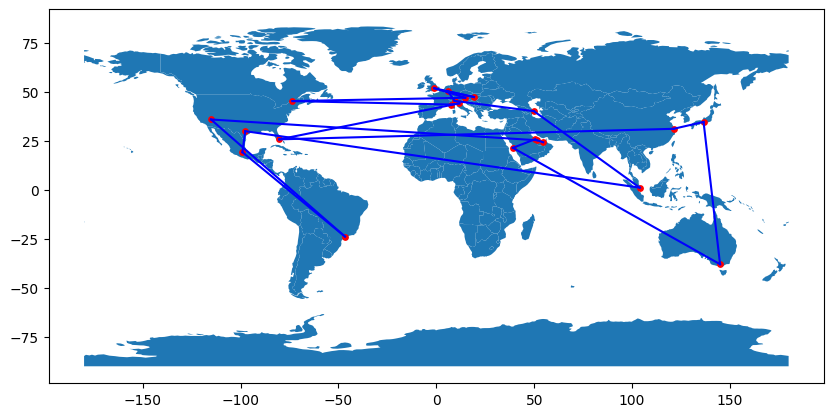

In [ ]:
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
gdf = GeoDataFrame(data, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

for i in range(len(data)-1):
    coords = gdf.iloc[i:i+2, :]['geometry'].values
    ax.plot([coords[0].x, coords[1].x], [coords[0].y, coords[1].y], color='blue')

# Problem 3

In [ ]:
D = np.zeros((data.shape[0], data.shape[0]))
for i in range(data.shape[0]):
  for j in range(data.shape[0]):
    D[i, j] = haversine(data.iloc[i].values[[4,3]], data.iloc[j].values[[4,3]], unit=Unit.MILES)
print(D)

[[    0.           782.0186292   7526.33358746  5004.32193545
   4228.32052921  7571.94288884  2497.08447583  2691.93970342
   6374.56424372  2430.46824102  3205.1126943   2255.17009696
   2883.52819249  2636.13545806   991.40941523  3931.13958324
   8020.89015492  8693.33861484  7340.53533805  8042.54532196
     69.52123802   277.30881571]
 [  782.0186292      0.          7964.28378082  5774.22564522
   5009.59962844  7211.38576407  2211.77680949  2367.43688319
   6169.71734721  2227.92893792  2992.13003543  2105.23963698
   2676.61942625  2359.52324903  1439.63972513  4569.17105088
   7849.07696237  8434.94510359  6558.8036191   8107.1129738
    825.89293171  1003.97535193]
 [ 7526.33358746  7964.28378082     0.          5051.44362983
   5019.57807724  9689.87016447  9995.74971507 10203.89086922
  10402.10972975  9866.75085043 10530.5770828   9660.02646685
  10259.88626133 10120.50863407  8071.40954233  3764.21032318
   8877.30171598  8427.9481834   8117.28305107  8159.39974997
   74

In [ ]:
D

array([[    0.        ,   782.0186292 ,  7526.33358746,  5004.32193545,
         4228.32052921,  7571.94288884,  2497.08447583,  2691.93970342,
         6374.56424372,  2430.46824102,  3205.1126943 ,  2255.17009696,
         2883.52819249,  2636.13545806,   991.40941523,  3931.13958324,
         8020.89015492,  8693.33861484,  7340.53533805,  8042.54532196,
           69.52123802,   277.30881571],
       [  782.0186292 ,     0.        ,  7964.28378082,  5774.22564522,
         5009.59962844,  7211.38576407,  2211.77680949,  2367.43688319,
         6169.71734721,  2227.92893792,  2992.13003543,  2105.23963698,
         2676.61942625,  2359.52324903,  1439.63972513,  4569.17105088,
         7849.07696237,  8434.94510359,  6558.8036191 ,  8107.1129738 ,
          825.89293171,  1003.97535193],
       [ 7526.33358746,  7964.28378082,     0.        ,  5051.44362983,
         5019.57807724,  9689.87016447,  9995.74971507, 10203.89086922,
        10402.10972975,  9866.75085043, 10530.5770828 

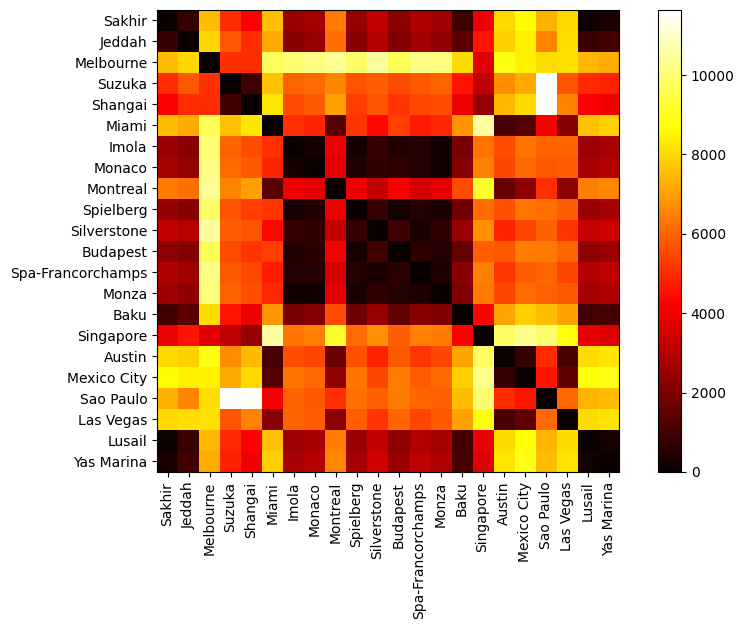

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(D, cmap='hot', interpolation='nearest')
plt.colorbar()
labels = data["City"]
plt.xticks(np.arange(len(labels)), labels, rotation="vertical")
plt.yticks(np.arange(len(labels)), labels)
plt.show()

# Problem 4

We can generate 4! = 24 possible calendars for the 1950 F1 season. Let's find the best one.

In [ ]:
cities = ["Silverstone", "Spa-Francorchamps", "Monza", "Monaco"]
indexes = [i for i in range(data.shape[0]) if data["City"].iloc[i] in cities]

In [ ]:
perms = list(permutations(indexes))
min_distance = float("inf")
min_distance_index = -1
for i in range(len(perms)):
  distance = 0
  for j in range(len(perms[i])-1):
    distance += D[perms[i][j], perms[i][j+1]]
  # distance += D[perms[i][0], perms[i][-1]] # Don't loop back
  if distance < min_distance:
    min_distance = distance
    min_distance_index = i
min_distance_route = data["City"].values[list(perms[min_distance_index])].tolist()

In [ ]:
print("Minimum Distance:", min_distance)
print("Minimum Distance Route:", data["City"].values[list(perms[min_distance_index])])

Minimum Distance: 847.7734227546838
Minimum Distance Route: ['Silverstone' 'Spa-Francorchamps' 'Monza' 'Monaco']


In [ ]:
print(math.factorial(22))

1124000727777607680000


In order to take the same approach for the 2024 season, we would need to generate 22! = 1124000727777607680000 racing calendars.

# Problem 5

In [ ]:
current = 0
visited = [current]
distance = 0

while len(visited) < 22:
  not_visited = [i for i in range(22) if i not in visited]
  next_index = not_visited[np.argmin(D[current, not_visited])]
  distance += D[current, next_index]
  current = next_index
  visited.append(current)

distances = [D[visited[i],visited[i+1]] for i in range(21)] + [D[visited[0],visited[-1]]]
route_distance = sum(distances) - max(distances)
index = distances.index(max(distances))

visited_new = []
for i in range(22):
  visited_new.append(visited[(index+i+1) % 22])
visited_new

[18, 0, 20, 21, 1, 14, 11, 9, 6, 13, 7, 12, 10, 8, 5, 16, 17, 19, 3, 4, 15, 2]

In [ ]:
print("Cities in order: ")
print(data["City"].values[visited_new])
print("Distance:", route_distance)

Cities in order: 
['Sao Paulo' 'Sakhir' 'Lusail' 'Yas Marina' 'Jeddah' 'Baku' 'Budapest'
 'Spielberg' 'Imola' 'Monza' 'Monaco' 'Spa-Francorchamps' 'Silverstone'
 'Montreal' 'Miami' 'Austin' 'Mexico City' 'Las Vegas' 'Suzuka' 'Shangai'
 'Singapore' 'Melbourne']
Distance: 33913.19525313043


<ipython-input-24-648018f2b593>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


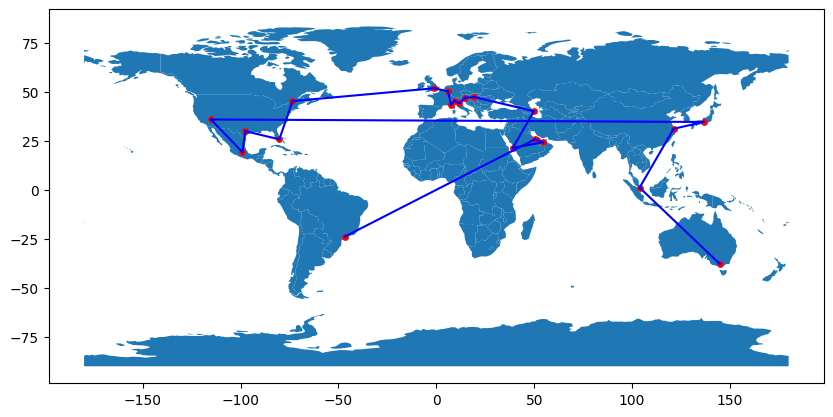

In [ ]:
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
gdf = GeoDataFrame(data, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

for i in range(len(data)-1):
    coords = gdf.iloc[visited_new[i:i+2], :]['geometry'].values
    ax.plot([coords[0].x, coords[1].x], [coords[0].y, coords[1].y], color='blue')

- Distance **before** heuristic: 120239.962 km
- Distance **after** heuristic: 55828.052 km

**Question (TODO)**: Should we also count the distance from the last city back to the first city?

# Problem 6

In [ ]:
!pip install pyomo
!pip install highspy

In [ ]:
import pyomo.environ as pyo

In [ ]:
!pip install cplex
!pip install docplex
matrix = D
n = len(matrix)
model = pyo.ConcreteModel()
solver = "cplex_direct"
SOLVER = pyo.SolverFactory(solver)
assert SOLVER.available(), f"Solver {solver} unavailable"
#Indexes for the cities
model.M = pyo.RangeSet(n)
model.N = pyo.RangeSet(n)

#Index for the dummy variable u
model.U = pyo.RangeSet(2,n)
model.x=pyo.Var(model.N,model.M, within=pyo.Binary)

#Dummy variable ui
model.u=pyo.Var(model.N, within=pyo.NonNegativeIntegers,bounds=(0,n-1))
model.c = pyo.Param(model.N, model.M,initialize=lambda model, i, j: matrix[i-1][j-1])
def obj_func(model):
    return sum(model.x[i,j] * model.c[i,j] for i in model.N for j in model.M)

model.objective = pyo.Objective(rule=obj_func,sense=pyo.minimize)
def rule_const1(model,M):
    return sum(model.x[i,M] for i in model.N if i!=M ) == 1

model.const1 = pyo.Constraint(model.M,rule=rule_const1)
def rule_const2(model,N):
    return sum(model.x[N,j] for j in model.M if j!=N) == 1

model.rest2 = pyo.Constraint(model.N,rule=rule_const2)
def rule_const3(model,i,j):
    if i!=j:
        return model.u[i] - model.u[j] + model.x[i,j] * n <= n-1
    else:
        return model.u[i] - model.u[i] == 0

model.rest3 = pyo.Constraint(model.U,model.N,rule=rule_const3)
#solver = pyo.SolverFactory('cplex')
result = SOLVER.solve(model,tee = False)
print(result)



Problem: 
- Name: 
  Lower bound: 38205.269795854205
  Upper bound: 38208.22392688993
  Number of objectives: 1
  Number of constraints: 506
  Number of variables: 506
  Number of binary variables: 484
  Number of integer variables: 22
  Number of continuous variables: 0
  Number of nonzeros: None
  Sense: 1
Solver: 
- Name: CPLEX 22.1.1.0
  Status: ok
  Wallclock time: 2.9871904850006104
  Termination condition: optimal
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [ ]:
route = [1]
for i in range(21):
  temp = np.array([model.x[(route[-1],j+1)]() for j in range(22)])
  temp[np.where(temp == None)] = 0.
  temp = temp.astype(float)
  temp = np.round(temp)
  index = np.where(temp == 1)[0][0]
  route.append(index+1)

In [ ]:
route

[1, 2, 12, 10, 7, 8, 14, 13, 11, 9, 20, 17, 18, 6, 19, 3, 16, 5, 4, 15, 22, 21]

In [ ]:
# route = [1, 2, 12, 10, 7, 8, 14, 13, 11, 9, 20, 17, 18, 6, 19, 3, 16, 5, 4, 15, 22, 21] # Q6
# Q7
route = [1, 21, 16, 3, 5, 4, 20, 18, 17, 9, 6, 19, 11, 13, 8, 7, 14, 10, 12, 15, 2, 22]

In [ ]:
city_order = [data["City"][route[i]-1] for i in range(data["City"].shape[0])]

<ipython-input-41-4b337e6880ff>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


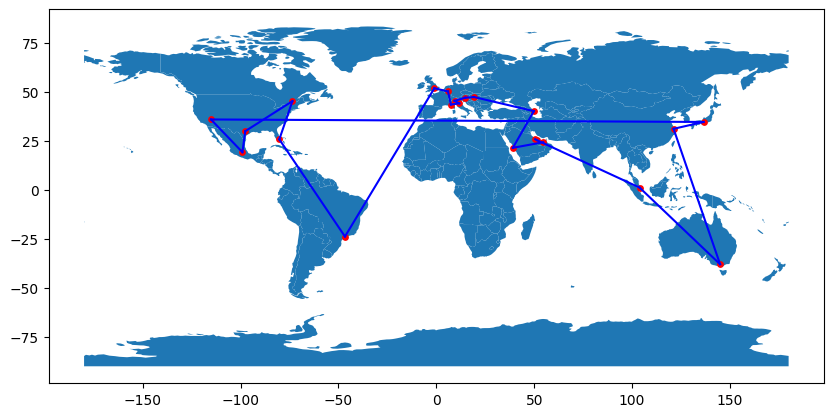

In [ ]:
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
gdf = GeoDataFrame(data, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

for i in range(len(data)-1):
    coords = gdf.iloc[[i-1 for i in route[i:i+2]], :]['geometry'].values
    ax.plot([coords[0].x, coords[1].x], [coords[0].y, coords[1].y], color='blue')

In [ ]:
distances = [D[route[i]-1,route[i+1]-1] for i in range(21)] + [D[route[0]-1,route[-1]-1]]
route_distance = sum(distances) - max(distances)
index = distances.index(max(distances))
route_distance

34740.04122471008

In [ ]:
sum(distances[:-1])

40379.41931773375

In [ ]:
city_order

['Sakhir',
 'Lusail',
 'Singapore',
 'Melbourne',
 'Shangai',
 'Suzuka',
 'Las Vegas',
 'Mexico City',
 'Austin',
 'Montreal',
 'Miami',
 'Sao Paulo',
 'Silverstone',
 'Spa-Francorchamps',
 'Monaco',
 'Imola',
 'Monza',
 'Spielberg',
 'Budapest',
 'Baku',
 'Jeddah',
 'Yas Marina']

In [ ]:
city_order_new = []
for i in range(22):
  city_order_new.append(city_order[(index+i+1) % 22])
city_order_new

['Silverstone',
 'Spa-Francorchamps',
 'Monaco',
 'Imola',
 'Monza',
 'Spielberg',
 'Budapest',
 'Baku',
 'Jeddah',
 'Yas Marina',
 'Sakhir',
 'Lusail',
 'Singapore',
 'Melbourne',
 'Shangai',
 'Suzuka',
 'Las Vegas',
 'Mexico City',
 'Austin',
 'Montreal',
 'Miami',
 'Sao Paulo']

In [ ]:
route_new = []
for i in range(22):
  route_new.append(route[(index+i+1) % 22])
route_new

[11, 13, 8, 7, 14, 10, 12, 15, 2, 22, 1, 21, 16, 3, 5, 4, 20, 18, 17, 9, 6, 19]

<ipython-input-45-1394152d7ba2>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


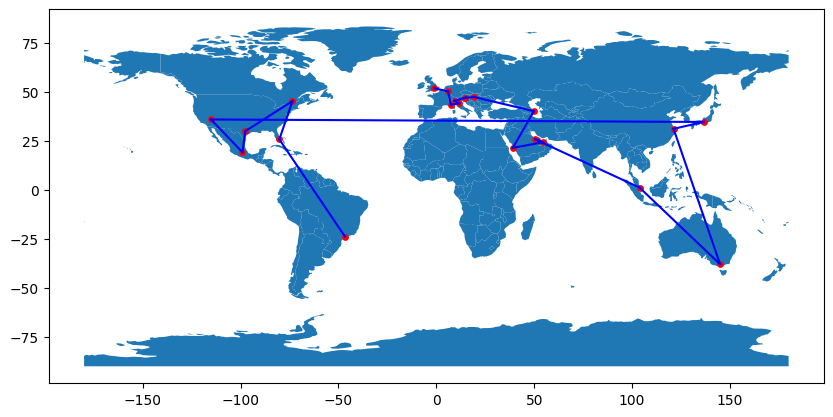

In [ ]:
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
gdf = GeoDataFrame(data, geometry=geometry)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='red', markersize=15)

for i in range(len(data)-1):
    coords = gdf.iloc[[i-1 for i in route_new[i:i+2]], :]['geometry'].values
    ax.plot([coords[0].x, coords[1].x], [coords[0].y, coords[1].y], color='blue')